# Classification using Stochastic Gradient Descent

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from time import time

## Training with various classifiers - training size increases after every iteration

- Create a synthetic dataset using make_classification
- Standardize with StandardScaler
- train_test_split
- Fit
- Predict & compute accuracy_score

## Functions for SGD, plotting

In [2]:
def run_sgd(loss, lr):
    hinge_acc = list()
    hinge_time = list()
    
    scaler = StandardScaler()
    
    sgd = SGDClassifier(alpha=lr, 
                    loss=loss, 
                    max_iter=100, 
                    tol=0.001, 
                    n_jobs=-1, 
                    early_stopping=True,
                    n_iter_no_change=2)
    
    for size in [int(10**(0.2*i)) for i in range(15, 31)]:
        prob = make_classification(n_samples=size, 
                                   n_features=100, 
                                   n_informative=45, 
                                   n_classes=2, 
                                   class_sep=0.75, 
                                   random_state=42)

        X, y = prob
        X = scaler.fit_transform(X)
        print('Size of X: ', X.shape)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        t1 = time()

        sgd.fit(X, y)

        t_delta = round(1e3*(time() - t1), 3)
        hinge_time.append(t_delta)
        print('Took {} m secs: '.format(t_delta))

        acc = accuracy_score(y_test, sgd.predict(X_test))
        hinge_acc.append(acc)
        print('Acc on test: ', acc)

    return hinge_time, hinge_acc

In [3]:
def plot_metrics(t, acc):
    fig = plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Accuracy')
    plt.ylabel('Acc')
    plt.plot(acc)
    
    plt.subplot(1, 2, 2)
    plt.title('Time taken')
    plt.ylabel('Time in ms')
    plt.plot(t)
    plt.show()

### SGDClassifier using Hinge Loss

In [4]:
t1, acc = run_sgd('hinge', 0.001)

Size of X:  (1000, 100)
Took 15.959 m secs: 
Acc on test:  0.665
Size of X:  (1584, 100)
Took 10.969 m secs: 
Acc on test:  0.6971608832807571
Size of X:  (2511, 100)
Took 17.951 m secs: 
Acc on test:  0.73558648111332
Size of X:  (3981, 100)
Took 19.945 m secs: 
Acc on test:  0.7214554579673776
Size of X:  (6309, 100)
Took 24.931 m secs: 
Acc on test:  0.7179080824088748
Size of X:  (10000, 100)
Took 52.857 m secs: 
Acc on test:  0.68
Size of X:  (15848, 100)
Took 64.826 m secs: 
Acc on test:  0.7529968454258675
Size of X:  (25118, 100)
Took 92.753 m secs: 
Acc on test:  0.7360668789808917
Size of X:  (39810, 100)
Took 144.614 m secs: 
Acc on test:  0.7430293896006028
Size of X:  (63095, 100)
Took 233.377 m secs: 
Acc on test:  0.7734368808938902
Size of X:  (100000, 100)
Took 370.011 m secs: 
Acc on test:  0.7683
Size of X:  (158489, 100)
Took 589.424 m secs: 
Acc on test:  0.7716890655561865
Size of X:  (251188, 100)
Took 1202.784 m secs: 
Acc on test:  0.7563199171941558
Size of X:

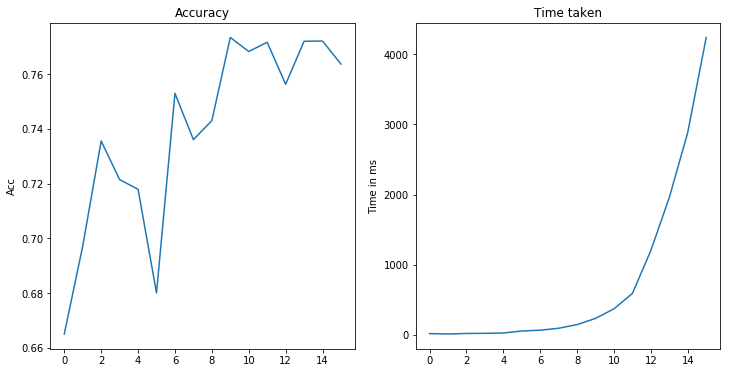

In [5]:
plot_metrics(t1, acc)

### SGDClassifier using log loss

In [6]:
t2, acc = run_sgd('log', 0.001)

Size of X:  (1000, 100)
Took 14.96 m secs: 
Acc on test:  0.74
Size of X:  (1584, 100)
Took 10.969 m secs: 
Acc on test:  0.6782334384858044
Size of X:  (2511, 100)
Took 12.964 m secs: 
Acc on test:  0.731610337972167
Size of X:  (3981, 100)
Took 17.953 m secs: 
Acc on test:  0.7214554579673776
Size of X:  (6309, 100)
Took 28.922 m secs: 
Acc on test:  0.7400950871632329
Size of X:  (10000, 100)
Took 37.901 m secs: 
Acc on test:  0.69
Size of X:  (15848, 100)
Took 67.816 m secs: 
Acc on test:  0.7397476340694006
Size of X:  (25118, 100)
Took 103.725 m secs: 
Acc on test:  0.746218152866242
Size of X:  (39810, 100)
Took 151.594 m secs: 
Acc on test:  0.7623712635016328
Size of X:  (63095, 100)
Took 292.219 m secs: 
Acc on test:  0.7828671051588874
Size of X:  (100000, 100)
Took 535.564 m secs: 
Acc on test:  0.77505
Size of X:  (158489, 100)
Took 640.289 m secs: 
Acc on test:  0.7783140892169853
Size of X:  (251188, 100)
Took 1032.24 m secs: 
Acc on test:  0.7629682710298977
Size of X: 

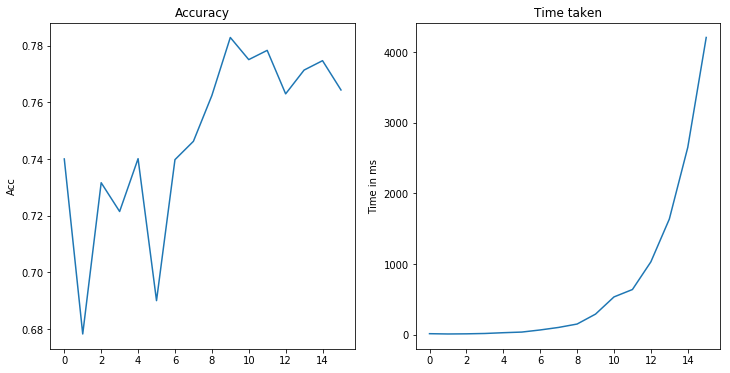

In [7]:
plot_metrics(t2, acc)

### SGDClassifier using perceptron loss

In [8]:
t3, acc = run_sgd('perceptron', 0.001)

Size of X:  (1000, 100)
Took 13.962 m secs: 
Acc on test:  0.705
Size of X:  (1584, 100)
Took 13.959 m secs: 
Acc on test:  0.7413249211356467
Size of X:  (2511, 100)
Took 17.952 m secs: 
Acc on test:  0.6759443339960238
Size of X:  (3981, 100)
Took 28.921 m secs: 
Acc on test:  0.7189460476787954
Size of X:  (6309, 100)
Took 21.94 m secs: 
Acc on test:  0.6751188589540412
Size of X:  (10000, 100)
Took 51.861 m secs: 
Acc on test:  0.6705
Size of X:  (15848, 100)
Took 50.867 m secs: 
Acc on test:  0.7211356466876971
Size of X:  (25118, 100)
Took 120.678 m secs: 
Acc on test:  0.7016321656050956
Size of X:  (39810, 100)
Took 134.641 m secs: 
Acc on test:  0.7020849032906304
Size of X:  (63095, 100)
Took 214.427 m secs: 
Acc on test:  0.715587605990966
Size of X:  (100000, 100)
Took 359.04 m secs: 
Acc on test:  0.71135
Size of X:  (158489, 100)
Took 579.454 m secs: 
Acc on test:  0.6890971039182283
Size of X:  (251188, 100)
Took 942.48 m secs: 
Acc on test:  0.661710259166368
Size of X:

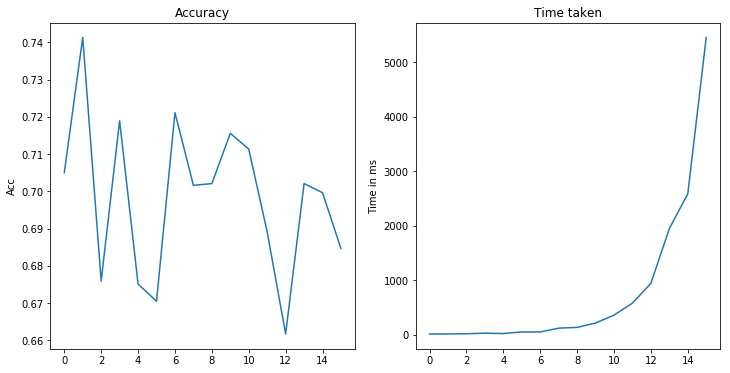

In [9]:
plot_metrics(t3, acc)

## Random Forest Classifier

In [12]:
def run_rf(n_est):
    hinge_acc = list()
    hinge_time = list()
    
    scaler = StandardScaler()
    
    rf = RandomForestClassifier(n_estimators=n_est,
                                max_depth=5)
    
    for size in [int(10**(0.2*i)) for i in range(15, 31)]:
        prob = make_classification(n_samples=size, 
                                   n_features=100, 
                                   n_informative=45, 
                                   n_classes=2, 
                                   class_sep=0.75, 
                                   random_state=42)

        X, y = prob
        X = scaler.fit_transform(X)
        print('Size of X: ', X.shape)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        t1 = time()

        rf.fit(X, y)

        t_delta = round(1e3*(time() - t1), 3)
        hinge_time.append(t_delta)
        print('Took {} m secs: '.format(t_delta))

        acc = accuracy_score(y_test, rf.predict(X_test))
        hinge_acc.append(acc)
        print('Acc on test: ', acc)

    return hinge_time, hinge_acc

In [13]:
t4, acc = run_rf(20)

Size of X:  (1000, 100)
Took 99.733 m secs: 
Acc on test:  0.935
Size of X:  (1584, 100)
Took 126.659 m secs: 
Acc on test:  0.9211356466876972
Size of X:  (2511, 100)
Took 197.496 m secs: 
Acc on test:  0.8807157057654076
Size of X:  (3981, 100)
Took 349.044 m secs: 
Acc on test:  0.890840652446675
Size of X:  (6309, 100)
Took 535.6 m secs: 
Acc on test:  0.8335974643423137
Size of X:  (10000, 100)
Took 853.718 m secs: 
Acc on test:  0.825
Size of X:  (15848, 100)
Took 1453.114 m secs: 
Acc on test:  0.817981072555205
Size of X:  (25118, 100)
Took 2277.909 m secs: 
Acc on test:  0.8389729299363057
Size of X:  (39810, 100)
Took 4260.608 m secs: 
Acc on test:  0.8295654358201457
Size of X:  (63095, 100)
Took 7180.802 m secs: 
Acc on test:  0.8178936524288771
Size of X:  (100000, 100)
Took 11233.962 m secs: 
Acc on test:  0.82125
Size of X:  (158489, 100)
Took 21489.541 m secs: 
Acc on test:  0.7941195028077481
Size of X:  (251188, 100)
Took 35963.839 m secs: 
Acc on test:  0.80349536207

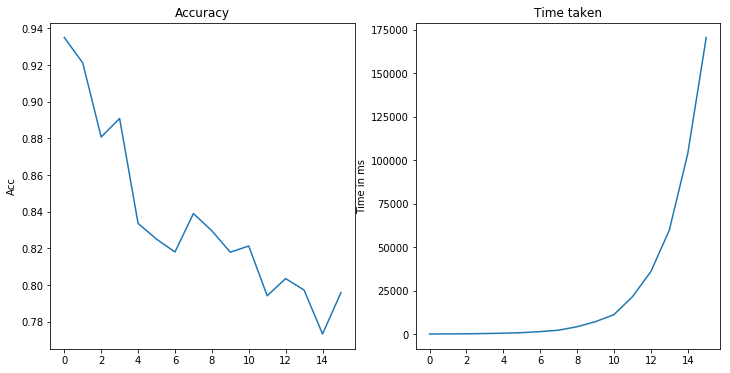

In [14]:
plot_metrics(t4, acc)

## Observations

RandomForestClassifier gives a better accuracy score in most cases, but SGDClassifier demonstrates a faster training time as compared to RandomForestClassifier. The difference is insignificant for a smaller dataset, but it becomes obvious for a larger one.

In [18]:
def time_comparison(t1, t2, t3, t4):
    fig = plt.figure(figsize=(12, 12))
    
    plt.subplot(2, 2, 1)
    plt.title('SGD using Hinge Loss')
    plt.plot(t1)
    plt.ylabel('time')
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.title('SGD using Log Loss')
    plt.plot(t2)
    plt.ylabel('time')
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.title('SGD using Perceptron Loss')
    plt.plot(t3)
    plt.ylabel('time')
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    plt.title('RandomForestClassifier')
    plt.plot(t4)
    plt.ylabel('time')
    plt.grid(True)

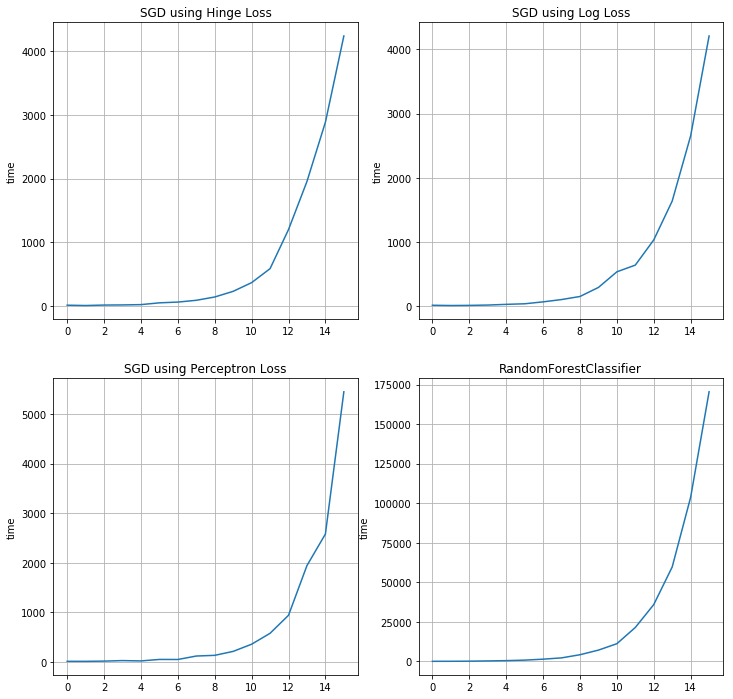

In [19]:
time_comparison(t1, t2, t3, t4)